# 1.4 Exercise 4 - [C-NOT]-gate operation on Qubit

### The Two-Qubit gate

---

The C-NOT gate acts similarly to an X gate, flipping the value of a certain Qubit. The difference between the C-NOT gate and the X gate is that the Qubit only changes if another Qubit has the value of 1. One Qubit is the "control" Qubit and the other is the "target" Qubit.

If the "control" Qubit is in the state |0> nothing happends to the "target", but if the "control" Qubit is in state |1> an X gate operation is applied to the "target" Qubit.


## 1.4.0 Import of libraries for the program

In [80]:
from qiskit import *

## 1.4.1 The Quantum Circuit

To start with, let's just create the quantum circuit and register as before.

---

In [111]:
# We create a new Quantum Register with 2 qubits.
qr = QuantumRegister(2)

# We also need to create a classical register to hold our measured values
cr = ClassicalRegister(2)

# Finally the circuit:
circuit = QuantumCircuit(qr,cr)

## 1.4.2 Adding operations to the Quantum Circuit
Here we add the C-NOT gate to the circuit.

---

In [112]:
# Here we append a C-NOT (CX) gate to our circuit
circuit.cx(qr[0],qr[1])

# Lastly the measure
circuit.measure(qr, cr)

circuit.draw();

## 1.4.3 Visualising the Quantum Circuit 
Here we can see that the C-Not gate is creating a line between our two qubits, connecting them together. The bottom qubit acting as the target and the top qubit acting as control.

---

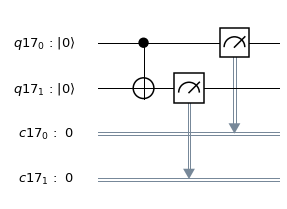

In [113]:
circuit.draw(output='mpl')

## 1.4.4 Run the Quantum Program

In [114]:
# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('qasm_simulator')

In [115]:
result = execute(circuit, backend).result()

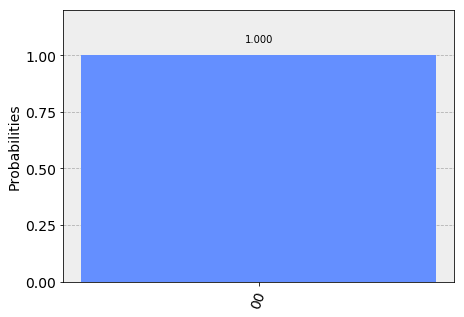

In [116]:
counts = result.get_counts(circuit)
plot_histogram(counts)

## 1.4.5 What happened?

Well. not much. Remember that the default state of a Qubit is 0, and that C-NOT gates only flip Qubits when the "control" Qubit is 1? Since our input was 00 (0 for both Qubits in our Quantum Register), our output was 00 as well.

Let's try again, but this time let's add an X gate to one of our Qubits.

In [117]:
# We create a new Quantum Register with 2 qubits.
qr = QuantumRegister(2)

# We also need to create a classical register to hold our measured values
cr = ClassicalRegister(2)

# Finally the circuit:
circuit = QuantumCircuit(qr,cr)

In [118]:
# This is where the magic happends.
circuit.x(qr[0]);

In [119]:
# Here we append a C-NOT (CX) gate to our circuit
circuit.cx(qr[0],qr[1])

# Lastly the measure
circuit.measure(qr, cr)

circuit.draw();

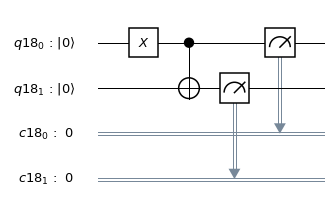

In [120]:
circuit.draw(output='mpl')

In [121]:
result = execute(circuit, backend).result()
counts = result.get_counts(circuit)

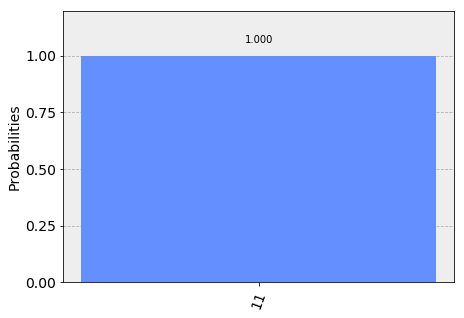

In [122]:
plot_histogram(counts)

## 1.4.6 What happened? - Part 2

Well. something definitly happened. This time, by using the x gate to flip our qubit the input was 01 and after applying the C-NOT gate, the output was 11.

Firstly, the result (11) visualized above should be read from right to left, as in binary.

11 = First Qubit value = 1, Second Qubit value = 1
Secondly, our result ended up as 11, since our first Qubit is fliped by the X gate from it's default value of 0 to a value of 1. Since the first Qubit is the "control" Qubit in our C-NOT gate, and the value of said Qubit is 1, it flips the "target" Qubit, the second Qubit. Giving us a result of 11.

This means that the control qubit had a direct effect on our target qubit. 